In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import data_analysis as da

%matplotlib inline 

In [4]:
#%pip install pandas
#%pip install matplotlib

  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)Note: you may need to restart the kernel to use updated packages.



You should consider upgrading via the 'C:\Users\EAkopyan\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
PATH = '..\data\Traces_Nanosatellites\Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
1,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
2,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06
3,-4.167305e+05,-4.253905e+05,-4.340304e+05,-4.426496e+05,-4.512477e+05,-4.598243e+05,-4.683791e+05,-4.769116e+05,-4.854214e+05,-4.939082e+05,...,1.408579e+06,1.411846e+06,1.415105e+06,1.418356e+06,1.421601e+06,1.424838e+06,1.428069e+06,1.431291e+06,1.434507e+06,1.437715e+06
4,-7.114496e+05,-7.251144e+05,-7.387446e+05,-7.523398e+05,-7.658991e+05,-7.794220e+05,-7.929078e+05,-8.063558e+05,-8.197656e+05,-8.331364e+05,...,2.332869e+06,2.337947e+06,2.343013e+06,2.348067e+06,2.353110e+06,2.358140e+06,2.363159e+06,2.368165e+06,2.373159e+06,2.378141e+06


In [4]:
sat_id = 0

sat = df[df.index.isin([3*sat_id, 3*sat_id+1, 3*sat_id+2])]
sat['coords'] = ['x','y','z']
sat = sat.set_index('coords', drop=True)
sat

C:\Users\EAkopyan\AppData\Local\Temp/ipykernel_11296/699165452.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat['coords'] = ['x','y','z']


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


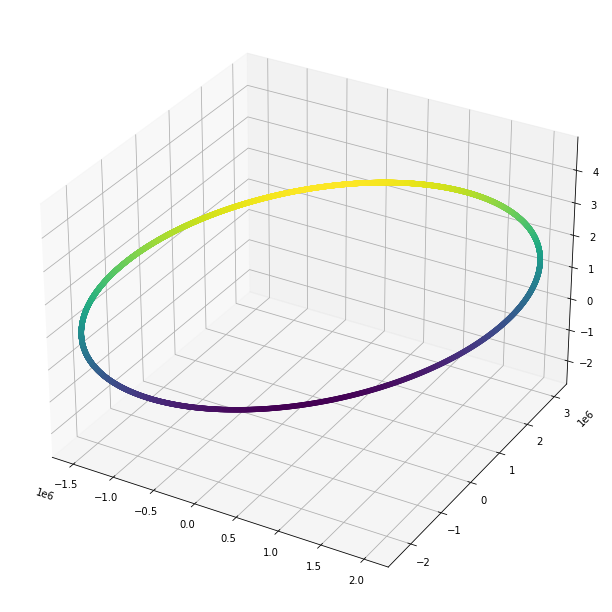

In [24]:
# 10000 seconds long trajectory of one satellite

fig = plt.figure(figsize=(14,11))
ax = plt.axes(projection='3d')

x_data = sat[sat.index=='x'].values
y_data = sat[sat.index=='y'].values
z_data = sat[sat.index=='z'].values
ax.scatter(x_data, y_data, z_data, c=z_data)


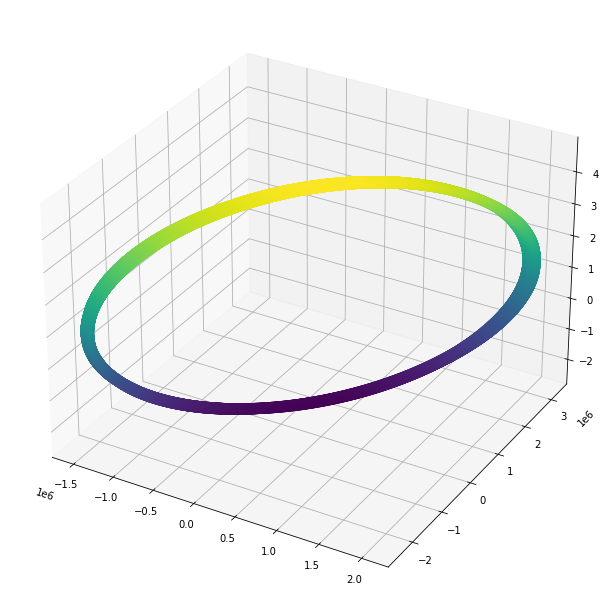

In [28]:
# 10000 seconds long trajectory of the whole swarm (100 satellites)

fig = plt.figure(figsize=(14,11))
ax = plt.axes(projection='3d')

x_data = df[df.index%3==0].values
y_data = df[df.index%3==1].values
z_data = df[df.index%3==2].values
ax.scatter(x_data, y_data, z_data, c=z_data)

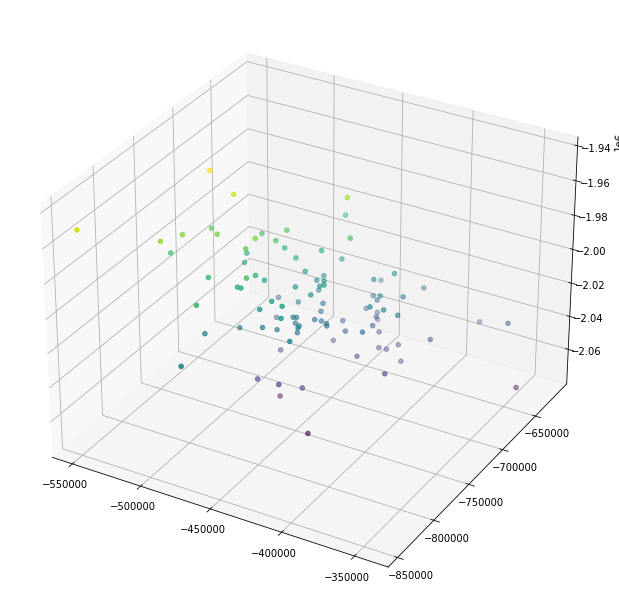

In [34]:
# 1 second long trajectory (position) of the swarm

sample_df = df[[0]]

fig = plt.figure(figsize=(14,11))
ax = plt.axes(projection='3d')

x_data = sample_df[sample_df.index%3==0].values
y_data = sample_df[sample_df.index%3==1].values
z_data = sample_df[sample_df.index%3==2].values
ax.scatter(x_data, y_data, z_data, c=z_data)

## Intersat distance distribution

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import data_analysis as da

%matplotlib inline 

In [4]:
PATH = '..\data\Traces_Nanosatellites\Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

for i in range(0,100):
    sat = df[df.index.isin([3*i, 3*i+1, 3*i+2])]
    sat['coords'] = ['x','y','z']
    satellites[i] = sat.set_index('coords', drop=True)
    
satellites[0].head()

C:\Users\EAkopyan\AppData\Local\Temp/ipykernel_16140/1279956197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat['coords'] = ['x','y','z']


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


In [65]:
t = 0
da.compute_dist(satellites[0], satellites[2], t)

54266.31505936242

In [66]:
dswarm = da.compute_swarm_mobility(satellites, timeslot=50)
len(dswarm[0])

Computing distances: 100%|██████████| 50/50 [00:25<00:00,  1.99it/s]


100

In [69]:
da.analyse_distances(dswarm)

Minimum distance in swarm: 15550.57427719171
Lower bound: 3632.1738808000114
Upper bound: 54101.07306885423

Average distance in swarm: 78054.95881061666
Lower bound: 55332.27005181385
Upper bound: 173270.4533328744

Maximum distance in swarm: 201584.20602454295
Lower bound: 156400.42212657214
Upper bound: 309707.31951707345


In [70]:
distances = [e for df in dswarm.values() for k in df.keys() for e in df[k]]
    
mins = [np.min(df[k]) for df in dswarm.values() for k in df.keys()] #Min distance for each sat
maxes = [np.max(df[k]) for df in dswarm.values() for k in df.keys()] #Max distance for each sat
means = [np.mean(df[k]) for df in dswarm.values() for k in df.keys()] #Mean distance for each sat

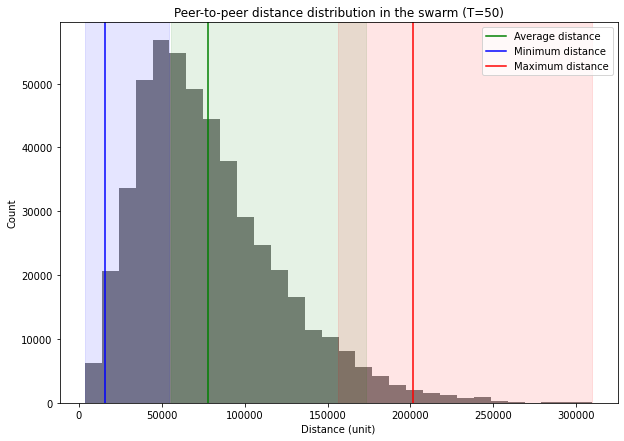

In [71]:
plt.figure(figsize=(10,7))
plt.hist(distances, density=False, bins=30, color='gray')
plt.axvline(np.mean(means), c='green', ls='-')
plt.axvline(np.mean(mins), c='blue', ls='-')
plt.axvline(np.mean(maxes), c='red', ls='-')
plt.axvspan(np.min(means),np.max(means), color='green', alpha=0.1)
plt.axvspan(np.min(mins),np.max(mins), color='blue', alpha=0.1)
plt.axvspan(np.min(maxes),np.max(maxes), color='red', alpha=0.1)
plt.title('Peer-to-peer distance distribution in the swarm (T=50)')
plt.xlabel('Distance (unit)')
plt.ylabel('Count')
plt.legend(['Average distance',
            'Minimum distance',
            'Maximum distance'])

In [ ]:
#Calcul de puissance
Pe = 1      #Puissance d'émission
Gr = 1      #Gain en réception
Gt = 1      #Gain d'émission
l = 2*10^6  #Longueur d'onde
R = 78042   #Portée
G = Gr*Gt
x = l/(4*np.pi)
alpha = G*pow(x,2)

Pr = Pe/pow(R,2)

Text(0.5, 1.0, 'Reception power with respect to peer-to-peer distance: Pr = Pe/R²')

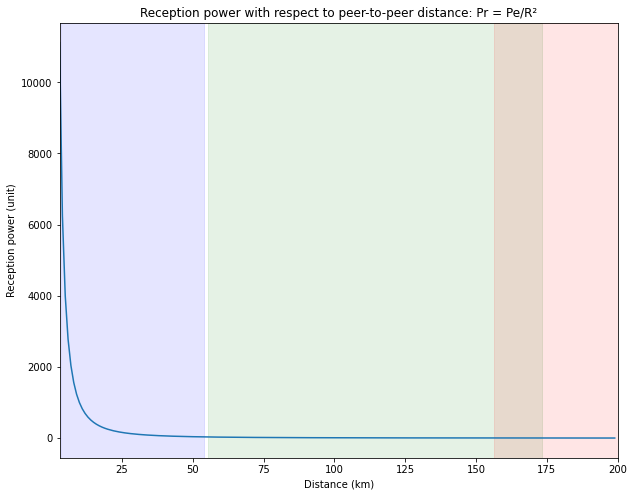

In [88]:
Pe = 100000
start, stop = 3, 200
x = np.arange(start,stop,1) 

plt.figure(figsize=(10,8))
plt.plot(x, [Pe/pow(e,2) for e in x])

plt.axvspan(np.min(means)/1000,np.max(means)/1000, color='green', alpha=0.1)
plt.axvspan(np.min(mins)/1000,np.max(mins)/1000, color='blue', alpha=0.1)
plt.axvspan(np.min(maxes)/1000,np.max(maxes)/1000, color='red', alpha=0.1)

plt.xlim(start,stop)
#plt.ylim(0,0.025)
plt.xlabel('Distance (km)')
plt.ylabel('Reception power (unit)')
plt.title('Reception power with respect to peer-to-peer distance: Pr = Pe/R²')

Text(0.5, 1.0, 'Required emission power with respect to peer-to-peer distance: Pe = Pr x R²')

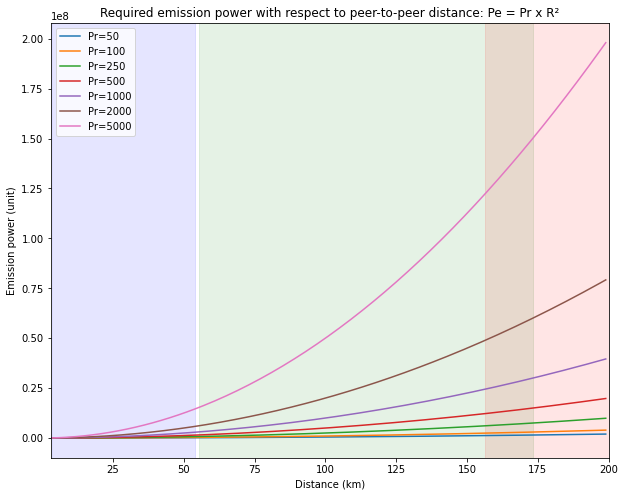

In [91]:
#Required emission power to ensure stable reception power wrt distance
Pr = [50,100,250,500,1000,2000, 5000]
x = np.arange(start,stop,1)

plt.figure(figsize=(10,8))
for p in Pr:
    plt.plot(x, [p*pow(e,2) for e in x])

plt.axvspan(np.min(means)/1000,np.max(means)/1000, color='green', alpha=0.1)
plt.axvspan(np.min(mins)/1000,np.max(mins)/1000, color='blue', alpha=0.1)
plt.axvspan(np.min(maxes)/1000,np.max(maxes)/1000, color='red', alpha=0.1)

plt.xlim(start,stop)
#plt.ylim(0,0.025)
plt.xlabel('Distance (km)')
plt.ylabel('Emission power (unit)')
plt.legend(['Pr='+str(p) for p in Pr])
plt.title('Required emission power with respect to peer-to-peer distance: Pe = Pr x R²')

## Neighbor discovery

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import data_analysis as da

%matplotlib inline 

In [2]:
PATH = '..\data\Traces_Nanosatellites\Traces.csv'

df = pd.read_csv(PATH, sep=',', header=None)
satellites = {}

for i in range(0,100):
    sat = df[df.index.isin([3*i, 3*i+1, 3*i+2])]
    sat['coords'] = ['x','y','z']
    satellites[i] = sat.set_index('coords', drop=True)
    
satellites[0].head()

C:\Users\EAkopyan\AppData\Local\Temp/ipykernel_15132/1279956197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sat['coords'] = ['x','y','z']


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
coords,,,,,,,,,,,,,,,,,,,,,
x,-4.850747e+05,-4.937755e+05,-5.024536e+05,-5.111086e+05,-5.197401e+05,-5.283476e+05,-5.369309e+05,-5.454894e+05,-5.540229e+05,-5.625310e+05,...,1.490967e+06,1.494274e+06,1.497573e+06,1.500865e+06,1.504149e+06,1.507425e+06,1.510693e+06,1.513954e+06,1.517206e+06,1.520451e+06
y,-7.066530e+05,-7.201117e+05,-7.335372e+05,-7.469290e+05,-7.602864e+05,-7.736088e+05,-7.868957e+05,-8.001464e+05,-8.133603e+05,-8.265368e+05,...,2.218138e+06,2.223313e+06,2.228477e+06,2.233629e+06,2.238769e+06,2.243898e+06,2.249015e+06,2.254120e+06,2.259214e+06,2.264296e+06
z,-2.026363e+06,-2.019625e+06,-2.012795e+06,-2.005871e+06,-1.998855e+06,-1.991747e+06,-1.984548e+06,-1.977257e+06,-1.969876e+06,-1.962403e+06,...,3.692429e+06,3.686602e+06,3.680756e+06,3.674890e+06,3.669006e+06,3.663103e+06,3.657180e+06,3.651239e+06,3.645278e+06,3.639299e+06


In [3]:
scopes = [50102, 78043, 204741]

In [4]:
inst_neighbors = da.find_neighbors(satellites, scopes[0])
print('Number of neighbors for node 0:', sum(inst_neighbors[0]))

Number of neighbors for node 0: 33


In [5]:
nb_neighbors = [sum(inst_neighbors[k]) for k in inst_neighbors.keys()]

print('Min number of neighbors:', np.min(nb_neighbors), 'for node', nb_neighbors.index(np.min(nb_neighbors)))
print('Mean number of neighbors:', np.mean(nb_neighbors))
print('Max number of neighbors:', np.max(nb_neighbors), 'for node', nb_neighbors.index(np.max(nb_neighbors)))

Min number of neighbors: 0 for node 54
Mean number of neighbors: 28.6
Max number of neighbors: 50 for node 24


In [92]:
scopes = [40000, 50102, 60000, 70000, 78043, 100000, 120000, 150000, 204741, 300000]

swarm_by_range = {}
for s in scopes:
    print('Maximum communication range:', s)
    swarm_by_range[s] = da.find_swarm_neighbors(satellites, s, timeslot=50)

Maximum communication range: 40000


Finding neighbors: 100%|██████████| 50/50 [00:25<00:00,  1.96it/s]


Maximum communication range: 50102


Finding neighbors: 100%|██████████| 50/50 [00:30<00:00,  1.64it/s]


Maximum communication range: 60000


Finding neighbors: 100%|██████████| 50/50 [00:27<00:00,  1.79it/s]


Maximum communication range: 70000


Finding neighbors: 100%|██████████| 50/50 [00:28<00:00,  1.78it/s]


Maximum communication range: 78043


Finding neighbors: 100%|██████████| 50/50 [00:30<00:00,  1.65it/s]


Maximum communication range: 100000


Finding neighbors: 100%|██████████| 50/50 [00:27<00:00,  1.84it/s]


Maximum communication range: 120000


Finding neighbors: 100%|██████████| 50/50 [00:27<00:00,  1.82it/s]


Maximum communication range: 150000


Finding neighbors: 100%|██████████| 50/50 [00:27<00:00,  1.80it/s]


Maximum communication range: 204741


Finding neighbors: 100%|██████████| 50/50 [00:29<00:00,  1.70it/s]


In [98]:
connectivity = {}

for scope,swarm in swarm_by_range.items():
    avg = {}
    for k in range(0,100):
        avg[k] = np.mean([sum(swarm[t][k]) for t in swarm.keys()])
    connectivity[scope] = avg

Text(0.5, 1.0, 'Evolution of node connectivity with respect to communication range')

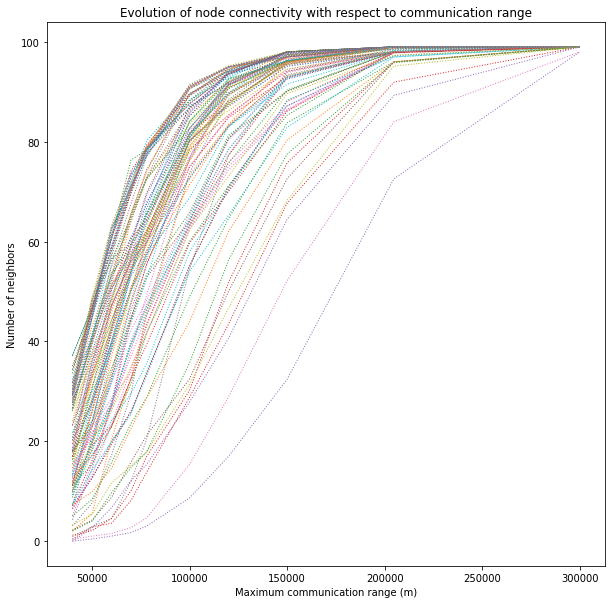

In [99]:
idx = list(connectivity.keys())
k = 0

plt.figure(figsize=(10,10))
for k in range(0,100):
    plt.plot(idx,[ sdic[k] for sdic in connectivity.values()], ls=':', lw=1)

#plt.legend(['Node '+str(k) for k in range(0,5)])
plt.xlabel('Maximum communication range (m)')
plt.ylabel('Number of neighbors')
plt.title('Evolution of node connectivity with respect to communication range')